# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [73]:
url =  "http://api.openweathermap.org/data/2.5/weather?"
response = requests.get(url).json()
units = "metric"
# Build query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [62]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
humidity=[]
wind =[]
cloudiness =[]
country = []
date = []
place = []

count = 0
set1 = 1
print('Beginning Data Retrieval')    
print('-----------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    count = count + 1
    if count == 50:
        count = count - 50
        set1 = set1 + 1
    try:
        print("Processing Record {} of Set {} | {}".format(count,set1,city))
        response = requests.get(query_url + city).json()

        place.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except KeyError:
        print("City not found. Skipping...")
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | suileng
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | berlevag
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | san cristobal
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | lerwick
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | la paz
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | kulunda
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | kloulklubed
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
print("City         ",len(place))
print("Cloudiness   ",len(cloudiness))
print("Country      ",len(country))
print("Date         ",len(date))
print("Humidity     ",len(humidity))
print("Lat          ",len(lat))
print("Lng          ",len(lng))
print("Max Temp     ",len(temp))
print("Wind         ",len(wind))

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind          530


In [41]:
# Store the values in a dictionary
weather_dict = { 'City' : place,
             'Cloudiness' : cloudiness,
             'Country' : country,
             'Date' : date,
             'Humidity' : humidity,
             'Lat' : lat,
             'Lng' : lng,
             'Max Temp' : temp,
             'Wind Speed' : wind,
}

# Display the DataFrame
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Okhotsk,84,RU,1570837581,67,59.36,143.24,-1.99,0.742
1,Hermanus,100,ZA,1570837715,91,-34.42,19.24,13.04,1.340
2,Katsuura,75,JP,1570837715,83,33.93,134.50,21.81,14.400
3,Geraldton,90,CA,1570837715,100,49.72,-86.95,14.00,4.100
4,Altay,0,CN,1570837716,45,47.83,88.13,2.28,2.111


In [45]:
# Export the city data into a .csv.
weather_df.to_csv("output_data_file.csv",index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

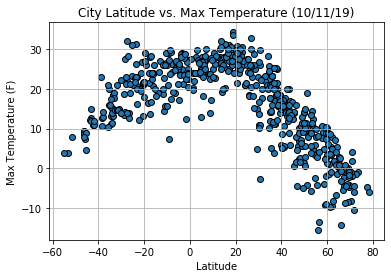

In [51]:
plt.scatter(lat, temp, marker="o", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (%s)" %time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("City Latitude vs. Max Temperature.png")

#### Latitude vs. Humidity Plot

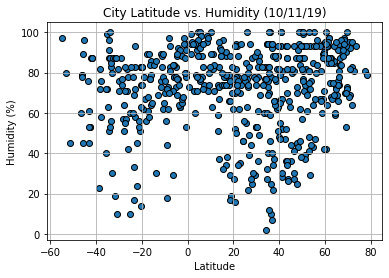

In [48]:
plt.scatter(lat,humidity,marker="o", edgecolors="black")
plt.title("City Latitude vs. Humidity (%s)" %time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("City Latitude vs. Humidity.png")

#### Latitude vs. Cloudiness Plot

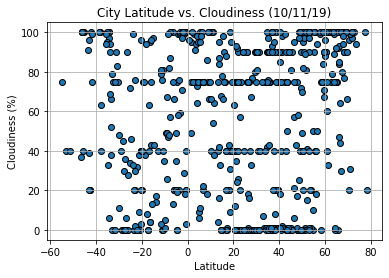

In [49]:
plt.scatter(lat,cloudiness,marker="o", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (%s)" %time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("City Latitude vs. Cloudiness.png")

#### Latitude vs. Wind Speed Plot

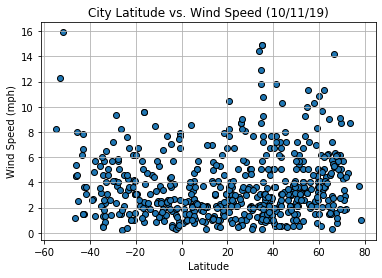

In [50]:
plt.scatter(lat,wind,marker="o", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (%s)" %time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("City Latitude vs. Wind Speed.png")